Full Name: Nguyễn Gia Bảo

Student ID: 22520109

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit. 
Otherwise, check the code carefully.


# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

random_state = 22520109
np.random.seed(random_state)

#load data
data = pd.read_csv(r'fish.csv')
X0 = data.drop(columns = ['Weight'])
Y0 = data['Weight'].to_numpy()

# Y0 = Y0.reshape(Y0.shape[0], 1)

#scale data

X0 = scale(X0)
Y0 = scale(Y0)


#split
X, X_test, y, y_test = train_test_split(X0, Y0, test_size=0.3, random_state=22520109)




In [2]:
class LinRegGD:
    def __init__(self, eta=0.001, max_it = 200, random_state=22520109):
        self.eta = eta 
        self.max_it = max_it 
        self.random_state = random_state
        self.w = None 
        self.costs = []

    def predict(self, X):
        return (X @ self.w[1:]) + self.w[0]

    def fit(self, X, y):
        #init basic values
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.costs = []

        for it in range(self.max_it):
            h = self.predict(X)         # h: hypothesis


            # h = h.reshape(h.shape[0], 1)   #fixing


            diff = y - h 


            # print(np.dot(X.T, diff).shape) #fixing 2
            # print(self.w[1:].shape)
            

            self.w[0] += self.eta * np.sum(diff)
            self.w[1:] += self.eta * np.dot(X.T, diff)

            cost = np.sum(diff ** 2)/ (2 * X.shape[0])
            self.costs.append(cost)




my model: 0.82399, with w = [-0.01323215  0.25984995  0.15800503  0.03405315  0.18951563  0.34856909]
SK model: 0.82338, with w = [-0.01160575  2.56949502 -1.4402091  -0.72721432  0.35735267  0.27970107]


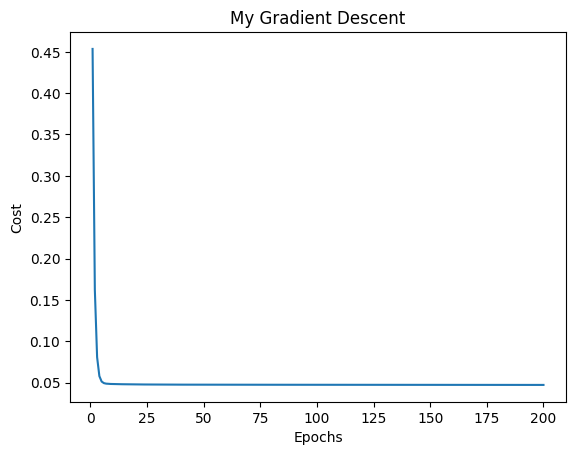

In [3]:

#train with my model 
myGD = LinRegGD(eta = 0.0033, max_it = 200, random_state=22520109)
myGD.fit(X, y)
yGD = myGD.predict(X_test)

#import model 
from sklearn.linear_model import LinearRegression
SK = LinearRegression()
SK.fit(X,y)
ySK = SK.predict(X_test)

#Compare result
from sklearn.metrics import r2_score as r2 
print("my model: {}, with w = {}".format(round(r2(y_test, yGD), 5), myGD.w))
print("SK model: {}, with w = {}".format(round(r2(y_test, ySK), 5), np.insert(SK.coef_, 0, SK.intercept_)))


#visualize
plt.plot(range(1, len(myGD.costs) + 1), myGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('My Gradient Descent')
plt.show()

In [4]:
#normal equation

class LinRegNE:
    def __init__(self, random_state = 22520109):
        self.random_state = random_state
        self.w = None

    def fit(self, X, y):
        pse_inv = np.linalg.inv(X.T @ X)
        w = pse_inv @ X.T @ y
        self.w = w

    def predict(self, X_test):
        yNE = X_test @ self.w 
        return yNE



In [5]:
myNE = LinRegNE(random_state = 22520109)
myNE.fit(X, y)
yNE = myNE.predict(X_test)
print("Using NE: {}, with w = {}".format(round(r2(y_test, yNE), 5), myNE.w))

Using NE: 0.82407, with w = [ 2.58166065 -1.45078205 -0.72861061  0.35787816  0.27996645]


# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [6]:
# Code here

#load data
ins_data = pd.read_csv(r'insurance.csv')
X0 = ins_data.drop(columns = ['charges'])
Y0 = ins_data['charges'].to_numpy()



#label encode
LabEnc = LabelEncoder()
X0['sex'] = LabEnc.fit_transform(X0['sex'])
X0['smoker'] = LabEnc.fit_transform(X0['smoker'])
X0['region'] = LabEnc.fit_transform(X0['region'])

#scale data
X0 = scale(X0)
Y0 = scale(Y0)


#split
X, X_test, y, y_test = train_test_split(X0, Y0, test_size=0.3, random_state=22520109)




my model: 0.75955, with w = [ 0.00861272  0.2929833  -0.01494514  0.1676825   0.04663956  0.80071819
 -0.02819594]
SK model: 0.75955, with w = [ 0.00861272  0.2929833  -0.01494514  0.1676825   0.04663956  0.80071819
 -0.02819594]


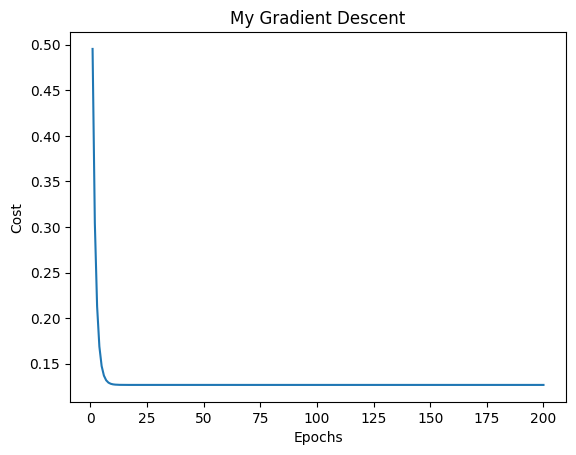

In [7]:

#train with my model 
myGD = LinRegGD(eta = 0.00033, max_it = 200, random_state=22520109)
myGD.fit(X, y)
yGD = myGD.predict(X_test)

#import model 
from sklearn.linear_model import LinearRegression
SK = LinearRegression()
SK.fit(X,y)
ySK = SK.predict(X_test)

#Compare result
from sklearn.metrics import r2_score as r2 
print("my model: {}, with w = {}".format(round(r2(y_test, yGD), 5), myGD.w))
print("SK model: {}, with w = {}".format(round(r2(y_test, ySK), 5), np.insert(SK.coef_, 0, SK.intercept_)))


#visualize
plt.plot(range(1, len(myGD.costs) + 1), myGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('My Gradient Descent')
plt.show()

In [8]:
#using Normal Equation

myNE = LinRegNE(random_state = 22520109)
myNE.fit(X, y)
yNE = myNE.predict(X_test)
print("Using NE: {}, with w = {}".format(round(r2(y_test, yNE), 5), myNE.w))

Using NE: 0.75998, with w = [ 0.29309999 -0.01504208  0.16767729  0.04673637  0.80044486 -0.02821881]


# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

In [9]:
# Code here

#load data
tesla_stock = pd.read_csv('tesla_stock.csv')

X0 = tesla_stock.drop(columns=['Close'])
Y0 = tesla_stock['Close']

#scale
X0 = scale(X0)
Y0 = scale(Y0)

#split data
X, X_test, y, y_test = train_test_split(X0, Y0, test_size=0.3, random_state=22520109)

0.9987 [-1.02936260e-04  3.28705352e-01  3.29021817e-01  3.40475035e-01
  9.67215503e-04]
0.99972 [ 2.31821052e-04 -5.95699059e-01  8.98968328e-01  6.97574700e-01
 -1.49455907e-03]


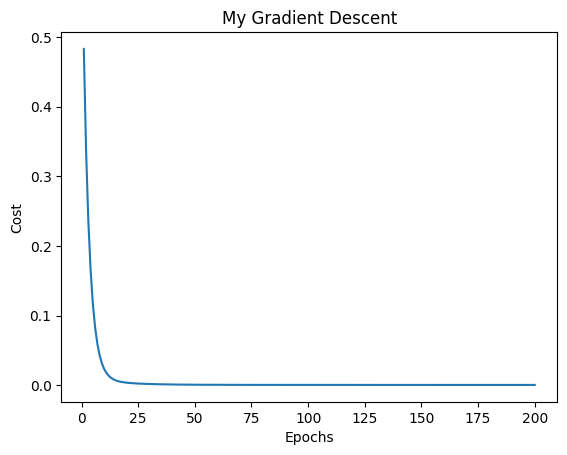

In [10]:

#train with my model 
myGD = LinRegGD(eta = 0.000031, max_it = 200, random_state=22520109)
myGD.fit(X, y)
yGD = myGD.predict(X_test)

#import model 
from sklearn.linear_model import LinearRegression
SK = LinearRegression()
SK.fit(X,y)
ySK = SK.predict(X_test)

#Compare result
from sklearn.metrics import r2_score as r2 
print(round(r2(y_test, yGD), 5), myGD.w)
print(round(r2(y_test, ySK), 5), np.insert(SK.coef_, 0, SK.intercept_))


#visualize
plt.plot(range(1, len(myGD.costs) + 1), myGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('My Gradient Descent')
plt.show()

In [11]:
#using Normal Equation

myNE = LinRegNE(random_state = 22520109)
myNE.fit(X, y)
yNE = myNE.predict(X_test)
print("Using NE: {}, with w = {}".format(round(r2(y_test, yNE), 5), myNE.w))

Using NE: 0.99972, with w = [-0.59557317  0.89880498  0.6976075  -0.00149191]
